In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import folium
from folium.plugins import MarkerCluster

In [6]:
# 폰트 수정 
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc("font", family = font_name)
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [8]:
df = pd.read_csv("./sejong_market.csv")
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA010120220700019175,세종수이비인후과의원,NaN,Q1,보건의료,Q102,의원,Q10201,내과/소아과 의원,Q86201,...,3611011600200050002000001,행정중심복합도시,세종특별자치시 세종특별자치시 해밀3로 43,NaN,30092,NaN,NaN,NaN,127.264487,36.528585
1,MA010120220800005576,우보설렁탕,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,4473025023100230051035586,NaN,세종특별자치시 세종특별자치시 조치원읍 문화로 24,339885.0,30025,NaN,NaN,NaN,127.301068,36.603770
2,MA010120220800006182,메이빈,NaN,I2,음식,I212,비알코올,I21201,카페,I56221,...,3611010300106640011000001,강남프라자,세종특별자치시 세종특별자치시 시청대로 127,339008.0,30151,NaN,3,NaN,127.286081,36.479674
3,MA010120220800008970,명품동태탕,NaN,I2,음식,I201,한식,I20102,국/탕/찌개류,I56111,...,3611035024103040008000001,행복마을,세종특별자치시 세종특별자치시 장군면 월현윗길 29,339914.0,30055,NaN,1,NaN,127.223073,36.501346
4,MA010120220800024017,컴119,NaN,S2,수리·개인,S201,컴퓨터 수리,S20101,컴퓨터/노트북/프린터 수리업,S95110,...,3611010600102180000000001,골든타원,세종특별자치시 세종특별자치시 노을3로 99,339014.0,30130,NaN,2,NaN,127.253843,36.479828


## 데이터 확인하기

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15298 entries, 0 to 15297
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     15298 non-null  object 
 1   상호명        15298 non-null  object 
 2   지점명        1969 non-null   object 
 3   상권업종대분류코드  15298 non-null  object 
 4   상권업종대분류명   15298 non-null  object 
 5   상권업종중분류코드  15298 non-null  object 
 6   상권업종중분류명   15298 non-null  object 
 7   상권업종소분류코드  15298 non-null  object 
 8   상권업종소분류명   15298 non-null  object 
 9   표준산업분류코드   15295 non-null  object 
 10  표준산업분류명    15295 non-null  object 
 11  시도코드       15298 non-null  int64  
 12  시도명        15298 non-null  object 
 13  시군구코드      15298 non-null  int64  
 14  시군구명       15298 non-null  object 
 15  행정동코드      15298 non-null  int64  
 16  행정동명       15298 non-null  object 
 17  법정동코드      15298 non-null  int64  
 18  법정동명       15298 non-null  object 
 19  지번코드       15298 non-null  int64  
 20  대지구분코드

In [13]:
df.describe()

,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,동정보,호정보,경도,위도
count,15298.0,15298.0,1.529800e+04,1.529800e+04,1.529800e+04,15298.000000,15272.000000,5294.000000,1.529800e+04,15298.000000,2488.000000,15139.000000,15298.000000,0.0,0.0,15298.000000,15298.000000
mean,36.0,36110.0,3.611044e+07,3.611019e+09,3.604882e+18,1.006471,584.969945,10.060257,3.611034e+11,327.257354,11.530949,339352.890283,30088.189110,NaN,NaN,127.272073,36.525398
std,0.0,0.0,1.211144e+02,9.991340e+03,1.487306e+17,0.080187,411.440009,20.617025,8.117786e+05,642.871905,13.354822,419.623064,46.762003,NaN,NaN,0.034279,0.056067
min,36.0,36110.0,3.611025e+07,3.611010e+09,3.611012e+14,1.000000,1.000000,1.000000,3.611020e+11,1.000000,1.000000,339001.000000,30000.000000,NaN,NaN,127.143084,36.410519
25%,36.0,36110.0,3.611034e+07,3.611011e+09,3.611011e+18,1.000000,228.000000,2.000000,3.611033e+11,22.000000,3.000000,339006.000000,30047.000000,NaN,NaN,127.252497,36.486504
50%,36.0,36110.0,3.611052e+07,3.611011e+09,3.611011e+18,1.000000,631.000000,5.000000,3.611033e+11,76.000000,9.000000,339012.000000,30098.000000,NaN,NaN,127.264911,36.502623
75%,36.0,36110.0,3.611054e+07,3.611025e+09,3.611025e+18,1.000000,774.000000,11.000000,3.611034e+11,240.000000,15.000000,339836.000000,30128.000000,NaN,NaN,127.293506,36.564281
max,36.0,36110.0,3.611058e+07,3.611039e+09,3.611039e+18,2.000000,2151.000000,480.000000,3.611049e+11,13020.000000,245.000000,339945.000000,30154.000000,NaN,NaN,127.407634,36.732433


In [11]:
# 결측치 확인
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          13329
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드         3
표준산업분류명          3
시도코드             0
시도명              0
시군구코드            0
시군구명             0
행정동코드            0
행정동명             0
법정동코드            0
법정동명             0
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지           26
지번부번지        10004
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        12810
건물관리번호          42
건물명           6006
도로명주소            0
구우편번호          159
신우편번호            0
동정보          15298
층정보           7845
호정보          15298
경도               0
위도               0
dtype: int64

- 결측치가 좀 있네
- 흠..
- 일단 필요한 것만 쓰자

## 데이터 심층적 이해

### 상권업종대분류명

In [15]:
# 업종을 상권업종대분류명으로 일단 구분해볼까
biz_big_count = df["상권업종대분류명"].value_counts()
print(biz_big_count)

상권업종대분류명
음식         5169
소매         3071
교육         1574
수리·개인      1557
과학·기술      1329
부동산         866
예술·스포츠      738
시설관리·임대     649
보건의료        234
숙박          111
Name: count, dtype: int64


- 세종시에는 음식과 소매업이 제일 많구나를 확인
- 시각화도 일단 해두자

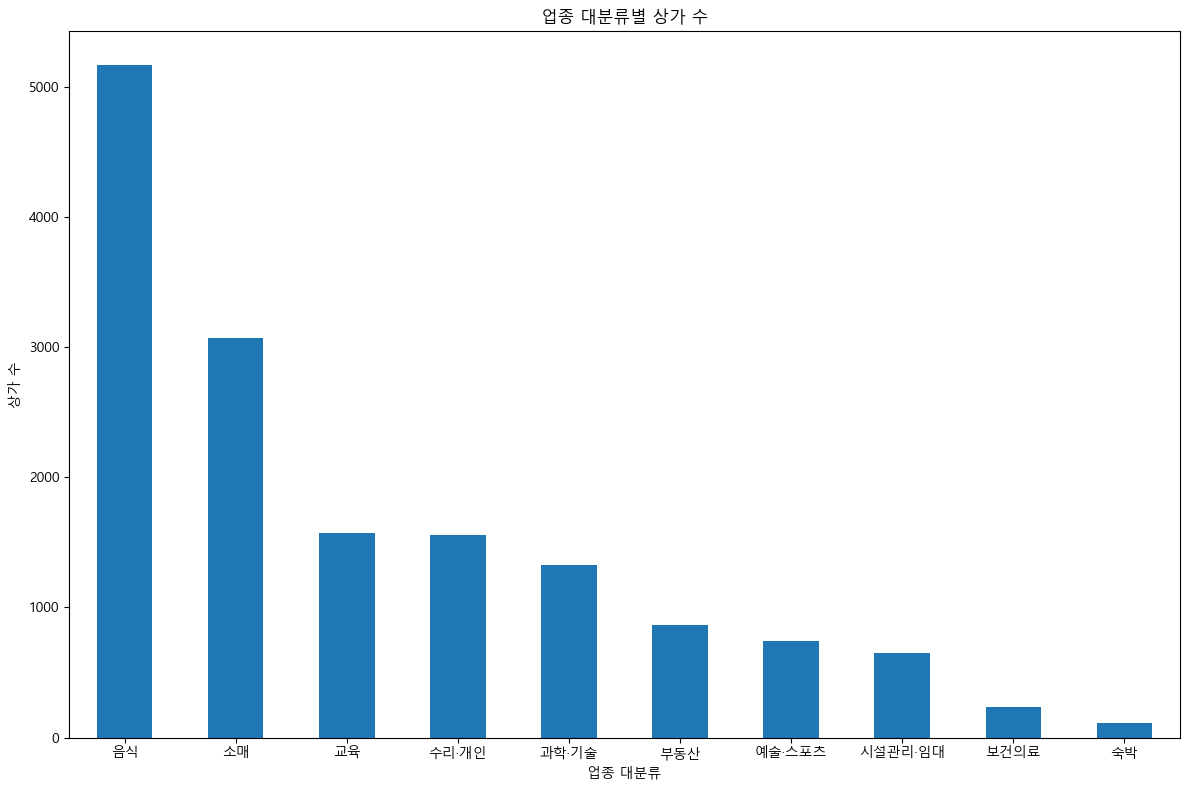

In [20]:
# 상권업종대분류명 시각화
plt.figure(figsize = (12,8))

biz_big_count.plot(kind="bar")
plt.title("업종 대분류별 상가 수")
plt.xlabel("업종 대분류")
plt.ylabel("상가 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### 행정동별 구분

In [24]:
## 행정동으로 분류해 보는 것도 좋을듯
dong_count = df["행정동명"].value_counts()
print(dong_count)

행정동명
조치원읍    2928
나성동     1951
보람동     1031
어진동      995
고운동      704
금남면      688
장군면      627
아름동      617
반곡동      602
도담동      584
새롬동      535
소담동      527
부강면      490
연서면      446
대평동      417
종촌동      403
다정동      393
전의면      303
한솔동      255
연기면      194
연동면      161
해밀동      157
소정면      147
전동면      143
Name: count, dtype: int64


- 실제로 군 부대를 세종시쪽으로 나와서 아는데
- 조치원 빼고 뭐 없는듯..

In [46]:
## 그림 생략(귀찮음)

### 업종 대분류 + 행정동 

In [26]:
## 상위 동 10개만 해볼까
top_10_dong = dong_count.head(10).index
top_10_dong

Index(['조치원읍', '나성동', '보람동', '어진동', '고운동', '금남면', '장군면', '아름동', '반곡동', '도담동'], dtype='object', name='행정동명')

In [27]:
## 교차표 만들기
dong_plus_biz = pd.crosstab(df[df["행정동명"].isin(top_10_dong)]["행정동명"],
                            df[df["행정동명"].isin(top_10_dong)]["상권업종대분류명"])
dong_plus_biz

상권업종대분류명,과학·기술,교육,보건의료,부동산,소매,수리·개인,숙박,시설관리·임대,예술·스포츠,음식
행정동명,,,,,,,,,,
고운동,39,151,10,46,96,80,1,11,41,229
금남면,54,22,2,55,147,70,11,55,28,244
나성동,271,191,50,128,290,208,1,89,94,629
도담동,27,48,6,30,81,68,1,10,50,263
반곡동,115,106,18,27,82,41,0,19,11,183
보람동,133,148,12,46,140,85,0,33,58,376
아름동,41,144,16,15,91,41,0,11,57,201
어진동,152,51,26,32,226,58,2,60,31,357
장군면,64,25,2,67,141,80,9,40,23,176


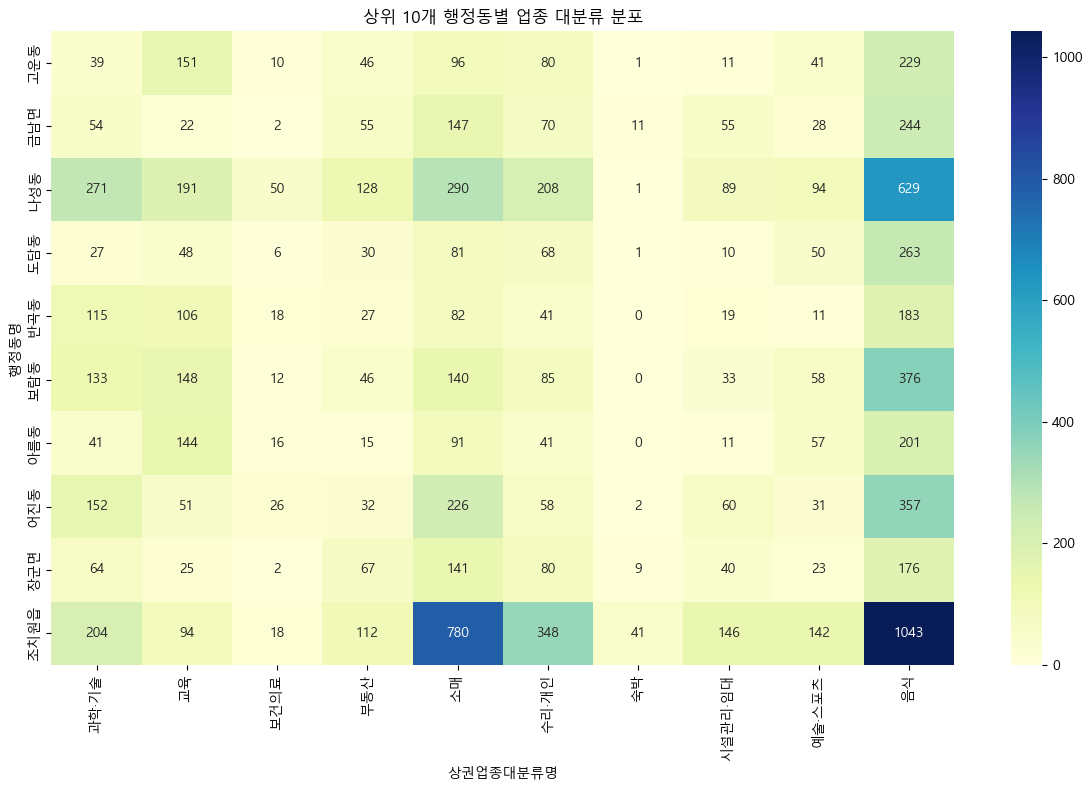

In [29]:
## 시각화
plt.figure(figsize=(12,8))

sns.heatmap(dong_plus_biz, annot = True, fmt = "d", cmap = "YlGnBu")
plt.title("상위 10개 행정동별 업종 대분류 분포")
plt.tight_layout()
plt.show()

- 시각화 안해도 뻔하긴 하지만..

### 지도로 만들어보기

In [76]:
map_data = df.dropna(subset=["위도", "경도"]).sample(1000)
map_data.head(5)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
5729,MA010120220808399683,한양공인중개사사무소,NaN,L1,부동산,L102,부동산 서비스,L10203,부동산 중개/대리업,L68221,...,3611010300106280002000001,스타힐타워1차,세종특별자치시 세종특별자치시 한누리대로 2135,339008.0,30150,NaN,1,NaN,127.289267,36.478369
2813,MA010120220805873176,의랑상회,NaN,G2,소매,G209,섬유·의복·신발 소매,G20905,기타 의류 소매업,G47414,...,4473025021100960004038561,NaN,세종특별자치시 세종특별자치시 조치원읍 새내10길 47,339883.0,30027,NaN,NaN,NaN,127.300832,36.600680
12794,MA0101202406A0246556,문화를그리다,NaN,N1,시설관리·임대,N108,기타 사업 서비스,N10802,전시/컨벤션/행사 대행 서비스업,N75992,...,4473025024100250001033811,NaN,세종특별자치시 세종특별자치시 조치원읍 새내로 125,339801.0,30023,NaN,3,NaN,127.297578,36.603049
8725,MA010120220813183855,당미소,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,3611011300100610000000001,NaN,세종특별자치시 세종특별자치시 보듬7로 61,339011.0,30100,NaN,1,NaN,127.252688,36.519292
10548,MA0101202301A0080340,1984그수육집칼국수세종새롬점,NaN,I2,음식,I201,한식,I20105,국수/칼국수,I56112,...,3611010800103010000000001,새뜸마을더샵힐스테이트10단지,세종특별자치시 세종특별자치시 새롬중앙로 90,339009.0,30127,NaN,NaN,NaN,127.251093,36.488566


In [34]:
# 세종시 중심 좌표 (데이터의 평균값 사용)
center_lat = map_data["위도"].mean()
center_lng = map_data["경도"].mean()

In [37]:
print(center_lat, center_lng)

36.52478610169878 127.2728070144067


In [38]:
# 지도 생성
map = folium.Map(location=[center_lat, center_lng], zoom_start=12)

In [41]:
## 마커 넣기
marker_cluster = MarkerCluster().add_to(map)

In [43]:
## 지도에 마커 넣기
for idx, row in map_data.iterrows():
    folium.Marker(
        location=[row["위도"], row["경도"]],
        popup=f"상호명: {row['상호명']}<br>업종: {row['상권업종소분류명']}<br>주소: {row['도로명주소']}",
        tooltip=row["상호명"]
    ).add_to(marker_cluster)

In [45]:
# 지도 저장
map.save("세종시_상가분포지도.html")

- 흠 조치원이 1등인데 랜덤샘플링으로 하면 이상한 곳이 더 많이 나오네
- 조치원만 해보자

### 조치원만을 위한 지도

In [67]:
jochiwon_data = map_data[map_data['행정동명'] == '조치원읍']

In [68]:
## 위에서 할걸 그랬지만 대분류 색깔별로 나누기
# ai최고

def sejong_biz_color(category):
    colors = {
        '음식': 'red',
        '소매': 'blue',
        '생활서비스': 'green',
        '학문/교육': 'purple',
        '부동산': 'orange',
        '숙박': 'darkred',
        '관광/여가/오락': 'darkblue',
        '의료': 'darkgreen',
        '스포츠': 'cadetblue',
        '금융': 'darkpurple'
    }
    # 카테고리가 없으면 회색으로 표시
    return colors.get(category, 'gray')

In [69]:
jochi_map = folium.Map(location=[center_lat, center_lng], zoom_start = 14)

In [70]:
jochi_cluster = MarkerCluster().add_to(jochi_map)

In [71]:
# 조치원읍 데이터만 추가 (최대 1000개)
for idx, row in jochiwon_data.head(1000).iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=f"상호명: {row['상호명']}<br>업종: {row['상권업종소분류명']}<br>주소: {row['도로명주소']}",
        tooltip=row['상호명'],
        icon=folium.Icon(color=sejong_biz_color(row['상권업종대분류명']))
    ).add_to(jochi_cluster)

In [72]:
# 조치원읍 지도 저장
jochi_map.save("조치원읍_상가분포지도.html")

- 책처럼 맵 만들어서 봤는데
- 오지게 확대해야 다 보이기 때문에
- 데이터프레임이나 차트시각화도 필요할 듯

In [75]:
## 조치원읍 업종 분석
jochi_category = jochiwon_data['상권업종대분류명'].value_counts()
print("조치원읍 업종 대분류별 상가 수:")
print(jochi_category)

조치원읍 업종 대분류별 상가 수:
상권업종대분류명
음식         71
소매         48
수리·개인      23
과학·기술      17
예술·스포츠     11
시설관리·임대    10
교육          6
부동산         4
숙박          1
Name: count, dtype: int64


- 실제 조치원만의 2923개인가 다 다루지는 않았지만,
- 위에 나와있는 개수들의 비율이 원본과 거의 일치하므로 전체 2923개를 다 해볼 필요는 없을 듯
- (하면 좋겠지만~)

## 머신러닝..?

- 군집분석정도 해보면 좋을듯